In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**TASK 1**: Dataset import

In [ ]:
#Load dataset
df=pd.read_csv("https://raw.githubusercontent.com/GeethaGunasekaran1/Dataset_rep/refs/heads/main/social_media_engagement_5000.csv")
df.head()


,user_id,age,gender,country,post_id,post_type,post_category,likes,comments,shares,watch_time_sec,impression_count,posted_at,follower_count,is_verified,device_type,sentiment,hashtags,engagement_rate
0,25795,43.0,Female,Brazil,496713,image,fitness,7011.0,354.0,1157.0,5726,44650,17-12-2022,81734,False,mobile,negative,#foodie #travel #love,0.190862
1,10860,33.0,Male,Brazil,157326,reel,food,11750.0,2606.0,1807.0,5947,80216,02-06-2023,5963,False,mobile,negative,#fitness,0.201493
2,86820,32.0,Female,UK,109864,text,food,4862.0,344.0,955.0,6946,44858,07-05-2023,501783,False,tablet,positive,#foodie,0.137345
3,64886,51.0,Other,France,848877,text,fitness,5350.0,1083.0,1049.0,229,70455,12-02-2023,480212,False,mobile,negative,#music #foodie #fun,0.106195
4,16265,34.0,Other,UK,449706,image,fitness,12682.0,2735.0,1300.0,4798,6019,23-05-2023,383936,False,mobile,negative,#travel,2.777372


In [ ]:
df.shape


(5000, 19)

In [ ]:
df.columns

Index(['user_id', 'age', 'gender', 'country', 'post_id', 'post_type',
       'post_category', 'likes', 'comments', 'shares', 'watch_time_sec',
       'impression_count', 'posted_at', 'follower_count', 'is_verified',
       'device_type', 'sentiment', 'hashtags', 'engagement_rate'],
      dtype='object')

In [ ]:
# convert date column to datetime
df['posted_at'] = pd.to_datetime(df['posted_at'], errors='coerce')

/tmp/ipython-input-855319172.py:2: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [ ]:
#check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           5000 non-null   int64         
 1   age               4850 non-null   float64       
 2   gender            4850 non-null   object        
 3   country           5000 non-null   object        
 4   post_id           5000 non-null   int64         
 5   post_type         5000 non-null   object        
 6   post_category     5000 non-null   object        
 7   likes             4850 non-null   float64       
 8   comments          4850 non-null   float64       
 9   shares            4850 non-null   float64       
 10  watch_time_sec    5000 non-null   int64         
 11  impression_count  5000 non-null   int64         
 12  posted_at         5000 non-null   datetime64[ns]
 13  follower_count    5000 non-null   int64         
 14  is_verified       5000 n

**TASK 2: Data cleaning**

In [ ]:
#check null values
df.isnull().sum()

,0
user_id,0
age,150
gender,150
country,0
post_id,0
post_type,0
post_category,0
likes,150
comments,150
shares,150


In [ ]:
#Fill numerical columns with median

num_columns = ['likes','comments','shares','impression_count','watch_time_sec','follower_count']
for columns in num_columns:
    df[columns].fillna(df[columns].median(), inplace=True)

# Fill categorical columns with mode
cat_columns = ['gender','post_type','country','sentiment','device_type']
for columns in cat_columns:
    df[columns].fillna(df[columns].mode()[0], inplace=True)

/tmp/ipython-input-4108394397.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columns].fillna(df[columns].median(), inplace=True)
/tmp/ipython-input-4108394397.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
# Remove duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
# Data formatting & corrections

df['gender'] = df['gender'].str.capitalize().replace({
    'm':'Male','f':'Female'
})
df['likes'] = df['likes'].clip(lower=0)
df['comments'] = df['comments'].clip(lower=0)
df['shares'] = df['shares'].clip(lower=0)

In [ ]:
# Hashtag count
df['hashtag_count'] = df['hashtags'].astype(str).apply(lambda x: x.count('#'))

# Clean sentiment
df['sentiment'] = df['sentiment'].str.lower().str.strip()

**TASK 3:Data Exploration**

In [ ]:
#using head function
df.head()

,user_id,age,gender,country,post_id,post_type,post_category,likes,comments,shares,watch_time_sec,impression_count,posted_at,follower_count,is_verified,device_type,sentiment,hashtags,engagement_rate,hashtag_count
0,25795,43.0,Female,Brazil,496713,image,fitness,7011.0,354.0,1157.0,5726,44650,2022-12-17,81734,False,mobile,negative,#foodie #travel #love,0.190862,3
1,10860,33.0,Male,Brazil,157326,reel,food,11750.0,2606.0,1807.0,5947,80216,2023-06-02,5963,False,mobile,negative,#fitness,0.201493,1
2,86820,32.0,Female,UK,109864,text,food,4862.0,344.0,955.0,6946,44858,2023-05-07,501783,False,tablet,positive,#foodie,0.137345,1
3,64886,51.0,Other,France,848877,text,fitness,5350.0,1083.0,1049.0,229,70455,2023-02-12,480212,False,mobile,negative,#music #foodie #fun,0.106195,3
4,16265,34.0,Other,UK,449706,image,fitness,12682.0,2735.0,1300.0,4798,6019,2023-05-23,383936,False,mobile,negative,#travel,2.777372,1


In [ ]:
df.tail()

,user_id,age,gender,country,post_id,post_type,post_category,likes,comments,shares,watch_time_sec,impression_count,posted_at,follower_count,is_verified,device_type,sentiment,hashtags,engagement_rate,hashtag_count
4995,59500,44.0,Male,Australia,441541,video,education,16210.0,2013.0,1837.0,6190,42977,2022-06-25,646147,False,mobile,positive,#travel #fun,0.466761,2
4996,22100,38.0,Other,UAE,677076,reel,education,16924.0,2734.0,1583.0,7764,34196,2022-11-18,584603,False,desktop,negative,#foodie #reels,0.621155,2
4997,67021,63.0,Female,USA,273595,text,travel,13487.0,1497.0,167.0,7466,23680,2023-04-06,483550,False,desktop,positive,#lifestyle #tech,0.679688,2
4998,29800,13.0,Female,Germany,785644,video,fitness,16894.0,1289.0,1713.0,4991,89013,2022-05-16,183295,False,tablet,positive,#reels #love #fitness,0.223518,3
4999,73400,54.0,Other,Japan,712252,text,travel,14830.0,503.0,1798.0,3743,14234,2023-03-04,585760,False,desktop,neutral,#foodie #lifestyle #fashion,1.203527,3


In [ ]:
df.describe()

,user_id,age,post_id,likes,comments,shares,watch_time_sec,impression_count,posted_at,follower_count,engagement_rate,hashtag_count
count,5000.000000,4850.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000
mean,54561.890800,38.454021,548042.909000,10106.997400,1502.039800,1002.9106,4014.503200,50013.732800,2022-12-28 13:21:30.240000,393698.224800,0.964356,1.998600
min,10055.000000,13.000000,100068.000000,10.000000,0.000000,0.0000,0.000000,105.000000,2022-01-01 00:00:00,87.000000,0.006363,1.000000
25%,32309.500000,26.000000,322543.500000,5235.000000,792.000000,511.0000,2017.750000,24988.250000,2022-07-03 18:00:00,194480.000000,0.145781,1.000000
50%,54374.500000,38.000000,548077.500000,10105.500000,1497.000000,1012.0000,4034.500000,49934.500000,2022-12-27 00:00:00,388982.000000,0.253896,2.000000
75%,77180.500000,51.000000,771574.500000,14959.000000,2235.250000,1483.0000,6020.250000,74662.250000,2023-06-28 00:00:00,589744.250000,0.504794,3.000000
max,99963.000000,64.000000,999455.000000,19998.000000,2999.000000,1999.0000,7998.000000,99995.000000,2023-12-31 00:00:00,799533.000000,191.504348,3.000000
std,26090.370121,14.912381,260646.957267,5702.293017,856.393312,570.8552,2308.096459,28844.939104,NaN,230927.884535,5.318029,0.812853


In [ ]:
df['post_type'].value_counts()


,count
post_type,
reel,1283
image,1247
text,1245
video,1225


In [ ]:
df['sentiment'].nunique()

3

In [ ]:
df['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
# Correlation matrix
corr = df[num_columns].corr()
corr

,likes,comments,shares,impression_count,watch_time_sec,follower_count
likes,1.000000,-0.018421,0.004712,0.007952,0.008710,-0.022982
comments,-0.018421,1.000000,0.006142,-0.009395,-0.016351,-0.011733
shares,0.004712,0.006142,1.000000,-0.005204,0.014658,-0.010783
impression_count,0.007952,-0.009395,-0.005204,1.000000,-0.004335,-0.015513
watch_time_sec,0.008710,-0.016351,0.014658,-0.004335,1.000000,0.002761
follower_count,-0.022982,-0.011733,-0.010783,-0.015513,0.002761,1.000000


In [ ]:
# Groupby examples
df.groupby('post_type')['likes'].mean()


,likes
post_type,
image,10104.865277
reel,10037.802416
text,10100.148193
video,10188.600000


In [ ]:
df.groupby('country')['impression_count'].mean()

,impression_count
country,
Australia,48346.383367
Brazil,49193.174603
Canada,48703.150097
France,51727.673387
Germany,48605.406122
India,52462.386916
Japan,49616.135593
UAE,48928.413519
UK,51119.393509


**TASK 4: Data wrangling**

In [ ]:
# split dataset into two parts

df1 = df.iloc[:2500]
df2 = df.iloc[2500:]
# Combine again
combined_df = pd.concat([df1, df2])
combined_df.shape

(5000, 21)

In [ ]:
# Create small dataframe with user info
user_info = df[['user_id','country','gender']].drop_duplicates()

# Merge back
merged_df = pd.merge(df, user_info, on='user_id', how='left')
merged_df.head()

,user_id,age,gender_x,country_x,post_id,post_type,post_category,likes,comments,shares,...,follower_count,is_verified,device_type,sentiment,hashtags,engagement_rate,hashtag_count,engagement_score,country_y,gender_y
0,25795,43.0,Female,Brazil,496713,image,fitness,7011.0,354.0,1157.0,...,81734,False,mobile,negative,#foodie #travel #love,0.190862,3,8522.0,Brazil,Female
1,10860,33.0,Male,Brazil,157326,reel,food,11750.0,2606.0,1807.0,...,5963,False,mobile,negative,#fitness,0.201493,1,16163.0,Brazil,Male
2,86820,32.0,Female,UK,109864,text,food,4862.0,344.0,955.0,...,501783,False,tablet,positive,#foodie,0.137345,1,6161.0,UK,Female
3,64886,51.0,Other,France,848877,text,fitness,5350.0,1083.0,1049.0,...,480212,False,mobile,negative,#music #foodie #fun,0.106195,3,7482.0,France,Other
4,16265,34.0,Other,UK,449706,image,fitness,12682.0,2735.0,1300.0,...,383936,False,mobile,negative,#travel,2.777372,1,16717.0,UK,Other


In [ ]:
# Set index for join
df_join1 = df.set_index('user_id')
df_join2 = user_info.set_index('user_id')

joined_df = df_join1.join(df_join2, rsuffix='_extra')
joined_df.head()

,age,gender,country,post_id,post_type,post_category,likes,comments,shares,watch_time_sec,...,follower_count,is_verified,device_type,sentiment,hashtags,engagement_rate,hashtag_count,engagement_score,country_extra,gender_extra
user_id,,,,,,,,,,,,,,,,,,,,,
25795,43.0,Female,Brazil,496713,image,fitness,7011.0,354.0,1157.0,5726,...,81734,False,mobile,negative,#foodie #travel #love,0.190862,3,8522.0,Brazil,Female
10860,33.0,Male,Brazil,157326,reel,food,11750.0,2606.0,1807.0,5947,...,5963,False,mobile,negative,#fitness,0.201493,1,16163.0,Brazil,Male
86820,32.0,Female,UK,109864,text,food,4862.0,344.0,955.0,6946,...,501783,False,tablet,positive,#foodie,0.137345,1,6161.0,UK,Female
64886,51.0,Other,France,848877,text,fitness,5350.0,1083.0,1049.0,229,...,480212,False,mobile,negative,#music #foodie #fun,0.106195,3,7482.0,France,Other
16265,34.0,Other,UK,449706,image,fitness,12682.0,2735.0,1300.0,4798,...,383936,False,mobile,negative,#travel,2.777372,1,16717.0,UK,Other


In [ ]:
# creating engagement_score

df['engagement_score'] = df['likes'] + df['comments'] + df['shares']


In [ ]:
# group by
summary=df.groupby(['post_type','country','sentiment'])['engagement_score'].mean()
summary

post_type  country    sentiment
image      Australia  negative      9927.277778
                      neutral      12776.450000
                      positive     12768.614035
           Brazil     negative     10218.800000
                      neutral      11012.209302
                                       ...     
video      UK         neutral      12956.852941
                      positive     11532.916667
           USA        negative     12738.950000
                      neutral      11633.057143
                      positive     11724.369565
Name: engagement_score, Length: 120, dtype: float64

**TASK 5 : Stastical Analysis**

In [ ]:
stats = df[['likes','comments','shares','watch_time_sec','engagement_rate','follower_count']]

stats.mean()
stats.median()
stats.mode()
stats.std()
stats.var()
stats.quantile([0.25,0.5,0.75])

,likes,comments,shares,watch_time_sec,engagement_rate,follower_count
0.25,5068.5,760.0,498.0,2017.75,0.145781,194480.00
0.50,10105.5,1497.0,1012.0,4034.50,0.253896,388982.00
0.75,15115.0,2256.0,1501.0,6020.25,0.504794,589744.25


In [ ]:
stats.skew()

,0
likes,-0.006813
comments,0.003206
shares,-0.012977
watch_time_sec,-0.018196
engagement_rate,18.781271
follower_count,0.041118


In [ ]:
stats.kurtosis()

,0
likes,-1.205547
comments,-1.200096
shares,-1.202503
watch_time_sec,-1.195652
engagement_rate,482.991739
follower_count,-1.189474


**TASK 6: Data visualization**

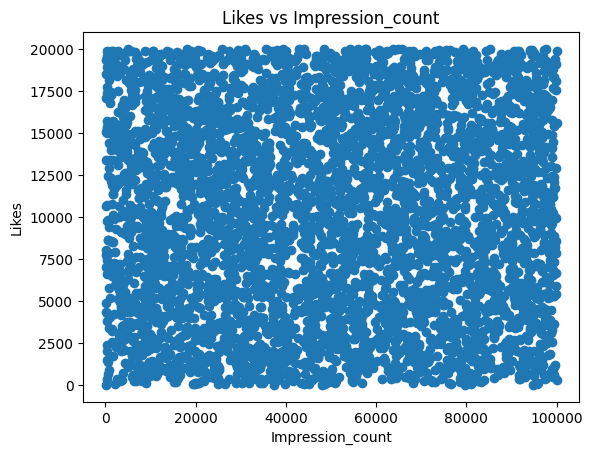

In [ ]:
# scatter chart
plt.scatter(df['impression_count'], df['likes'])
plt.xlabel("Impression_count")
plt.ylabel("Likes")
plt.title("Likes vs Impression_count")
plt.show()

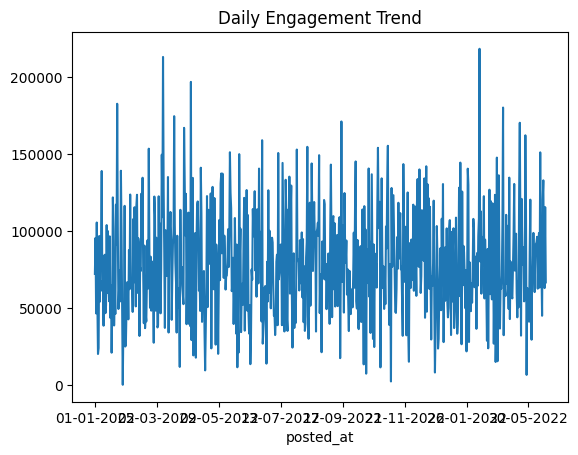

In [ ]:
# Line chart
df.groupby('posted_at')['engagement_score'].sum().plot()
plt.title("Daily Engagement Trend")
plt.show()

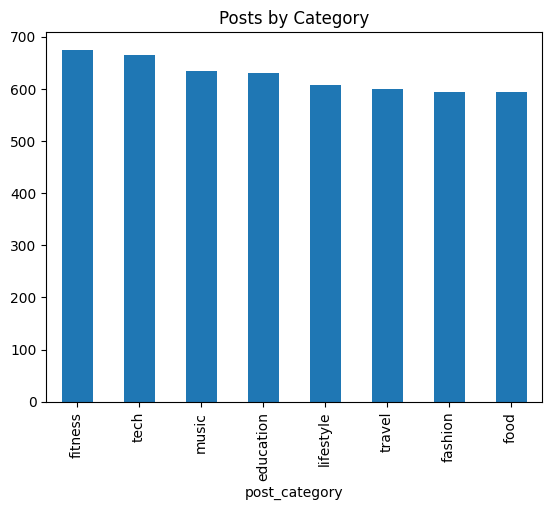

In [ ]:
# Bar chart
df['post_category'].value_counts().plot(kind='bar')
plt.title("Posts by Category")
plt.show()

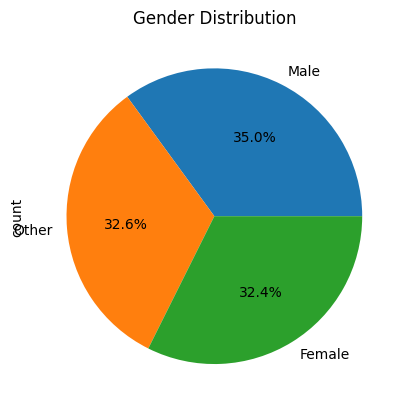

In [ ]:
# Pie chart
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

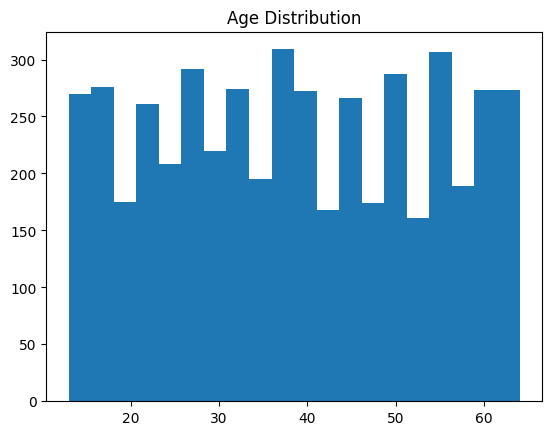

In [ ]:
# Histogram
plt.hist(df['age'], bins=20)
plt.title("Age Distribution")
plt.show()

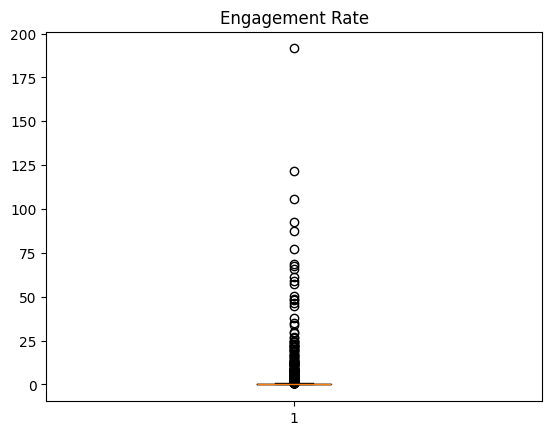

In [ ]:
# Box plot
plt.boxplot(df['engagement_rate'])
plt.title("Engagement Rate")
plt.show()

**SEABORN**

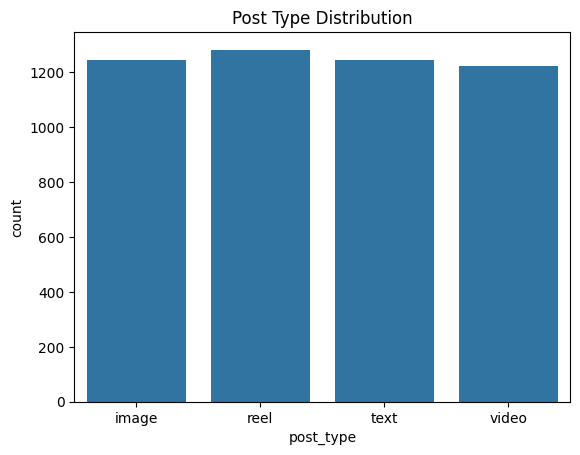

In [ ]:
# Count plot
sns.countplot(x='post_type', data=df)
plt.title("Post Type Distribution")
plt.show()

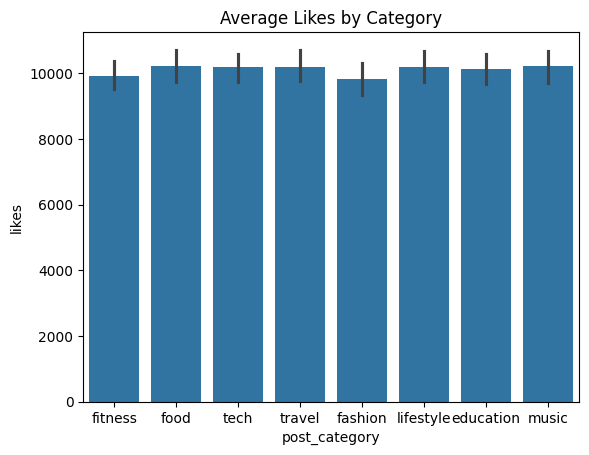

In [ ]:
# Bar plot
sns.barplot(x='post_category', y='likes', data=df)
plt.title("Average Likes by Category")
plt.show()

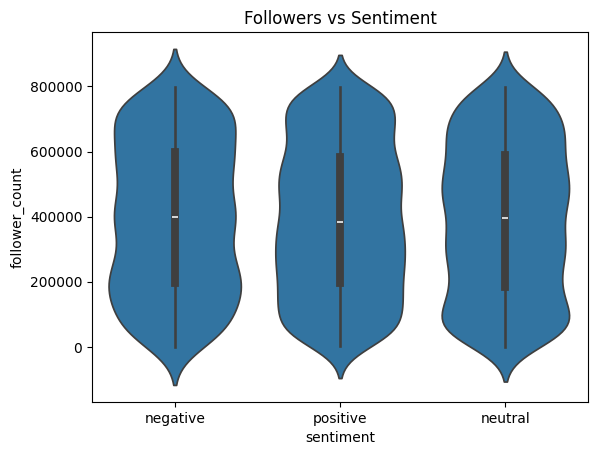

In [ ]:
# Violin plot
sns.violinplot(x='sentiment', y='follower_count', data=df)
plt.title("Followers vs Sentiment")
plt.show()

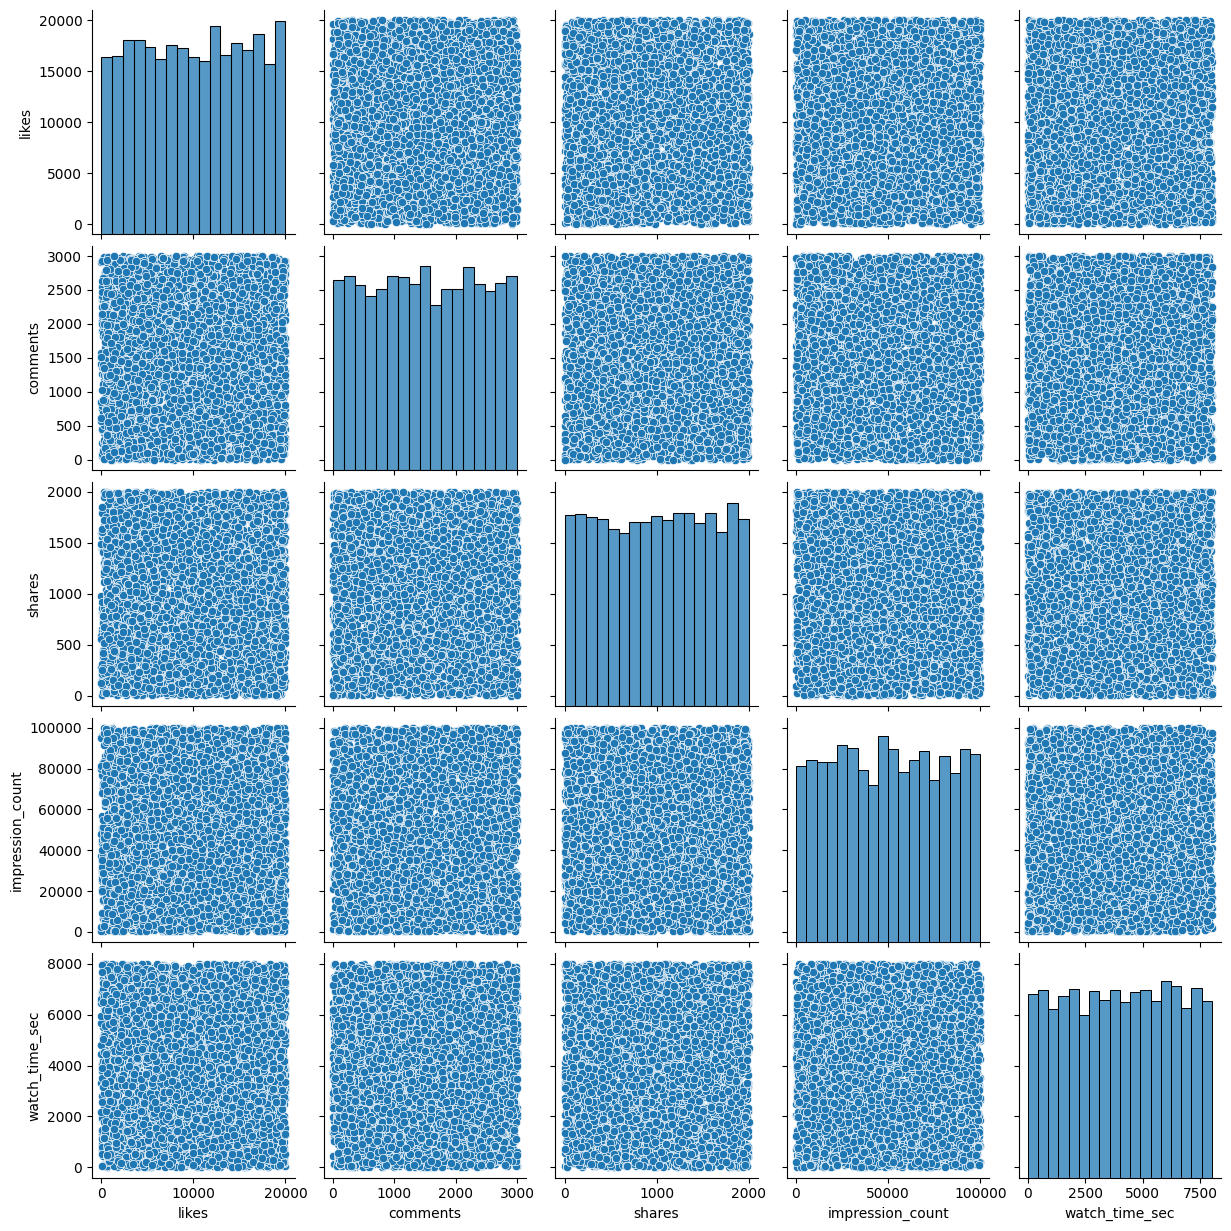

In [ ]:
# Pair plot
num_columns = df[['likes','comments','shares','impression_count','watch_time_sec']]
sns.pairplot(num_columns)
plt.show()

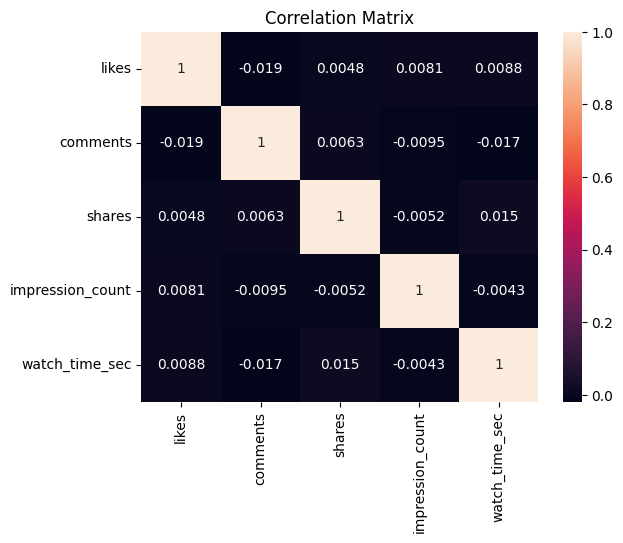

In [ ]:
# Heat Map
corr = num_columns.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

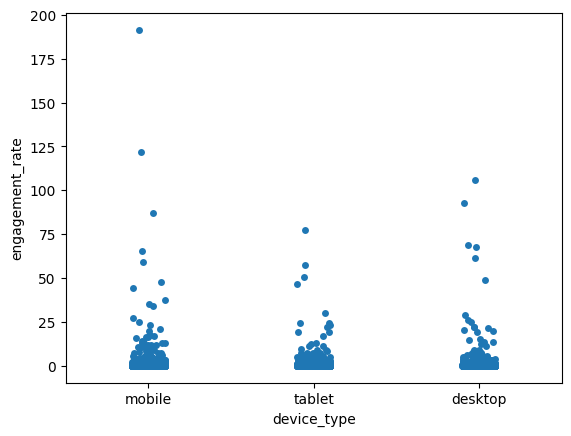

In [ ]:
#strip plot instead of swarm plot
sns.stripplot(x='device_type', y='engagement_rate', data=df)
plt.show()

In [ ]:
# ploty
import plotly.express as px

px.scatter(df, x='impression_count', y='likes', color='post_type',title="Interaction Engagement Analysis:Likes vs Impression_count")


**FINAL INSIGHTS**

Content performance

which post type have the highest engagement?

In [ ]:
df.groupby('post_type')['engagement_rate'].mean().sort_values(ascending=False)

,engagement_rate
post_type,
video,1.122365
text,1.064549
image,0.895646
reel,0.783047


Engagement was analyzed across post types.Video post type have highest engagement rate.

Best-performing content category?

In [ ]:
df.groupby('post_category')['likes'].mean().sort_values(ascending=False)

,likes
post_category,
food,10230.585237
music,10208.340872
travel,10198.951973
lifestyle,10184.053448
tech,10172.992320
education,10127.138889
fitness,9910.263636
fashion,9835.164931


Average likes were compared across categories. The food and music categories got higher average likes,showing they are more popular with users.

which Countries have highest  average engagement rate?

In [ ]:
df.groupby('country')['engagement_rate'].mean().sort_values(ascending=False).head()

,engagement_rate
country,
Brazil,1.540704
Australia,1.324339
France,1.146402
UAE,1.112352
Canada,0.916659


Engagement rate also varies by country,indicaating that users from Brazil interact more with posts.

**USER TRENDS**

How age affects engagement?

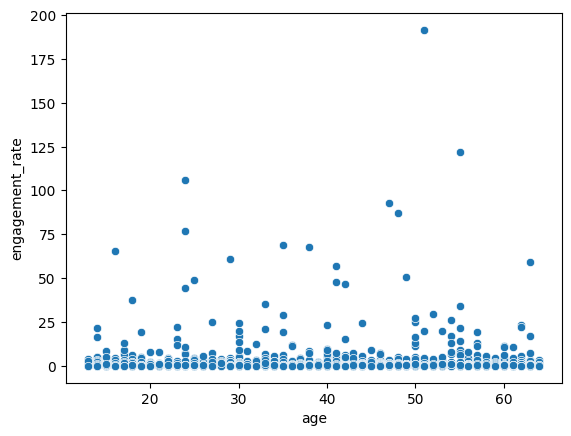

In [ ]:
sns.scatterplot(x='age', y='engagement_rate', data=df)
plt.show()

Engagement changes with age.Some age groups interact more than others.

Performance difference for verified accounts

In [ ]:
df.groupby('is_verified')['engagement_rate'].mean()

,engagement_rate
is_verified,
False,0.954744
True,1.054250


Verified accounts usually perform differently compared to non-verified accounts because users may trust verified profiles more.

**BEHAVIORAL INSIGHTS**

Best time of day for impressions

In [ ]:
df['hour'] = df['posted_at'].dt.hour
df.groupby('hour')['impression_count'].mean().sort_values(ascending=False)

,impression_count
hour,
0,50013.7328


Impression count vary by time of day.The highest impression were recorded at hour 0.Which represent Midnight.

Device type impact on watch time

In [ ]:
df.groupby('device_type')['watch_time_sec'].mean()

,watch_time_sec
device_type,
desktop,3974.792521
mobile,4087.830760
tablet,3979.736429


Device type affects watch time.Mobile spends more time watching content than other type.

**SENTIMENT ANALYSIS**

Which sentiment performs best?

In [ ]:
df.groupby('sentiment')['engagement_rate'].mean().sort_values(ascending=False)

,engagement_rate
sentiment,
negative,1.038486
neutral,0.991170
positive,0.954800


it shows negative post received the highest engagement rate.

Behaviour of negative/neutral sentiment posts

In [ ]:
df[df['sentiment'].isin(['negative','neutral'])] \
    .groupby('sentiment')[['likes','comments','shares']].mean()

,likes,comments,shares
sentiment,,,
negative,10211.406452,1516.584402,1007.186966
neutral,9917.785570,1529.270525,996.149966


Negative posts got more likes and shares.Neutral posts got more comments.this shows negative content spreads more.